In [117]:
import seaborn as sns
import numpy as np
import pandas as pd

In [118]:
df=sns.load_dataset('iris')

In [119]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [120]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [121]:
set(df['species'])

{'setosa', 'versicolor', 'virginica'}

In [122]:
df = df[df['species'] != 'setosa']

In [123]:
df['species'] != 'setosa'

50     True
51     True
52     True
53     True
54     True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: species, Length: 100, dtype: bool

In [124]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [125]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [126]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [127]:
## features into independent and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [128]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [129]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [132]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
138,6.0,3.0,4.8,1.8
76,6.8,2.8,4.8,1.4
92,5.8,2.6,4.0,1.2
119,6.0,2.2,5.0,1.5
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
resgression = LogisticRegression()
resgression

LogisticRegression()

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
parameter = {'C':[0.5,1,2,3,4,5,6,7,9,10,30,45], 'penalty':['l1','l2','elasticnet']}

In [137]:
log_regressor = GridSearchCV(resgression,parameter,scoring='accuracy',cv=5)

In [138]:
log_regressor.fit(X,y)

C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [139]:
log_regressor.best_params_

{'C': 10, 'penalty': 'l2'}

In [140]:
log_regressor.best_score_

0.97

In [141]:
prediction_log = log_regressor.predict(X_test)

In [142]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


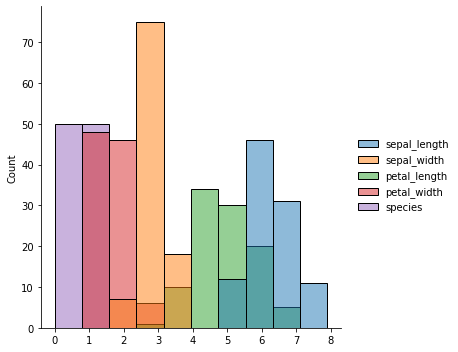

In [143]:
sns.displot(df)

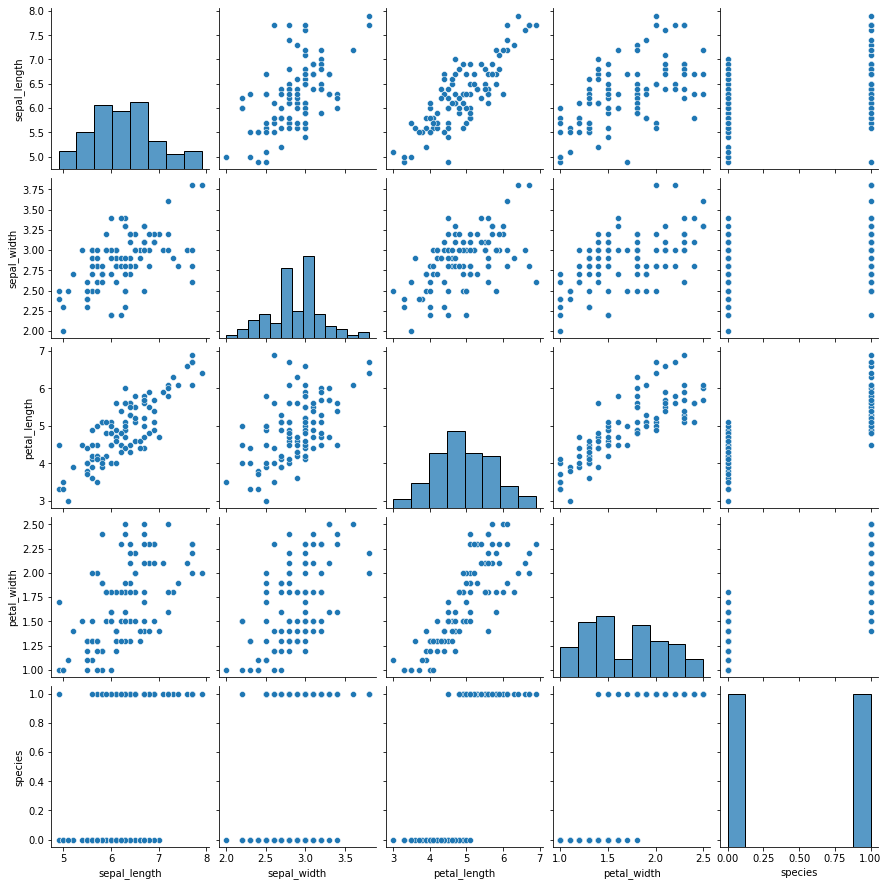

In [144]:
sns.pairplot(df)

In [145]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [146]:
confusion_matrix(y_test,prediction_log)

array([[11,  1],
       [ 0,  8]], dtype=int64)

In [147]:
f1_score(y_test,prediction_log)

0.9411764705882353